# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


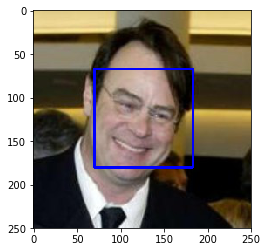

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

In [4]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
dog_face_counter=0
human_face_counter=0

total_number_faces=len(dog_files_short)
for face in range(total_number_faces):
    if face_detector(human_files_short[face]) == True:
        human_face_counter += 1
    if face_detector(dog_files_short[face]) == True:
        dog_face_counter += 1

print("Number of human faces in human files ")
print(human_face_counter)
print("Percentage of human faces: "+"{:.2%}".format(human_face_counter/ total_number_faces));

print("Number of human faces in dog files")
print(dog_face_counter)
print("Percentage of human faces in dog files: "+"{:.2%}".format(dog_face_counter / total_number_faces));


Number of human faces in human files 
98
Percentage of human faces: 98.00%
Number of human faces in dog files
17
Percentage of human faces in dog files: 17.00%


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [7]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [5]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:07<00:00, 48466536.16it/s]


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [7]:
from PIL import Image
import torchvision.transforms as transforms
from torch.autograd import Variable
import torch.nn.functional as F

# Set PIL to be tolerant of image files that are truncated.
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
   
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    mean_values = [0.485, 0.456, 0.406]
    standard_deviation_values = [0.229, 0.224, 0.225]
    image_size = 224
    batch_size = 16
    random_rotation_value =45
    dimension = 1
    #index at which image index may be found
    class_index=1
    
    ## select an image via chosen path
    selected_image = Image.open(img_path)
    #Steps to process an image
    #declare your transforms 
    data_transform = transforms.Compose([transforms.RandomRotation(random_rotation_value),
                                        transforms.RandomResizedCrop(image_size),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean_values,standard_deviation_values)])
    
    
    selected_image = data_transform(selected_image)
    #print("shape of image")
    #print(selected_image.shape)
    
    # To create a tensor of dimension 1 
    selected_image = selected_image.unsqueeze(0).to(torch.device('cuda'))
   
   # selected_image = Variable(selected_image)
    # Run variable through pretrained model to create associated index
    
    index_for_image = VGG16(Variable(selected_image))
   
    
    index_for_image =torch.max(index_for_image.data,dimension)
   # print(index_for_image)
   # print(index_for_image[0])
    #print(index_for_image[1])
      
    index_for_image= int(index_for_image[class_index])
   
    return index_for_image

VGG16_predict(dog_files_short[65])# check the output of the method


236

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [8]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    
    index_for_dog_image = VGG16_predict(img_path)
    return ((index_for_dog_image <= 268) & (index_for_dog_image >= 151))

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 


In [9]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
dog_face_counter=0
human_face_counter=0

total_number_dogs=len(dog_files_short)

for dog in range(total_number_dogs):
    if dog_detector(human_files_short[dog]) == True:
        human_face_counter += 1
    if dog_detector(dog_files_short[dog]) == True:
        dog_face_counter += 1

print("Number of dogs in human files ")
print(human_face_counter)
print("Percentage of dogs: "+"{:.2%}".format(human_face_counter/ total_number_dogs));

print("Number of dogs in dog files")
print(dog_face_counter)
print("Percentage of dogs in dog files: "+"{:.2%}".format(dog_face_counter / total_number_dogs));


Number of dogs in human files 
4
Percentage of dogs: 4.00%
Number of dogs in dog files
96
Percentage of dogs in dog files: 96.00%


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [12]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [10]:
import os
from torchvision import datasets

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes


#Specify directories

data_directory = '/data/dog_images'
train_directory = data_directory + '/train'
valid_directory = data_directory + '/valid'
test_directory = data_directory + '/test'

mean_values = [0.485, 0.456, 0.406]
standard_deviation_values = [0.229, 0.224, 0.225]
image_size = 224
image_resize_value=256
batch_size =64
random_rotation_value =45


train_transforms = transforms.Compose([transforms.RandomRotation(random_rotation_value),
                                       transforms.RandomResizedCrop(image_size),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize(mean_values,standard_deviation_values)])

test_transforms = transforms.Compose([transforms.Resize(image_resize_value),
                                      transforms.CenterCrop(image_size),
                                      transforms.ToTensor(),
                                      transforms.Normalize(mean_values,standard_deviation_values)])

validation_transforms = transforms.Compose([transforms.Resize(image_resize_value),
                                            transforms.CenterCrop(image_size),
                                            transforms.ToTensor(),
                                            transforms.Normalize(mean_values,standard_deviation_values)])


#  Load the datasets with ImageFolder
train_data = datasets.ImageFolder(train_directory, transform=train_transforms)
validation_data = datasets.ImageFolder(valid_directory, transform=validation_transforms)
test_data = datasets.ImageFolder(test_directory ,transform = test_transforms)

# TODO: Using the image datasets and the trainforms, define the dataloaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size, shuffle=True)
validation_loader = torch.utils.data.DataLoader(validation_data, batch_size,shuffle = True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size , shuffle = True)

loaders_scratch = {'train': train_loader, 'valid': validation_loader, 'test' : test_loader}

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:
The code resizes the images to 224, this is because VGG-16 requires an input image of size 224x224 so the image is cropped to 224x224
the image tensor has a size of 3x224x224 where 3 represents the RGB channel
The code does use image augmentation, the image is rotated by 45 degrees and it is flipped as well




### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [11]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
      #Specify variables
        input_channels_RGB=3
        output_channel_0=16
        output_channel_1=32
        output_channel_2=64
        
        
        #kernel_size=3
        kernel_size_maxpool=2
        #if padding is not initialized to a desired figure, a default of 0 is applied, a padding of 1 is desired
        #padding=1
        #stride is 1 by default and so not mentioned
        maxpool_stride=2
        drop_out=0.50
        hidden_layer_nodes=1024
        output_layer_nodes=133
        imagesize_after_maxpoolings= 28
        flatten_tensor_parameter= -1


        #create convolutional, pooling, linear and dropout layers
        #output_channel of one convolutional layer is input channel of  the next convolutional layer starting from the first
        #create convolutional layers

        # create first convolutional layer 
        self.first_convolutional_layer = nn.Conv2d(input_channels_RGB, output_channel_0, kernel_size=3, padding=1)
       
       
        # create second convolutional layer 
        self.second_convolutional_layer = nn.Conv2d(output_channel_0, output_channel_1, kernel_size=3, padding=1)
        # create third convolutional layer 
        self.third_convolutional_layer = nn.Conv2d(output_channel_1, output_channel_2, kernel_size=3, padding=1)
      
       

        # max pooling layer
        self.apply_maxpooling = nn.MaxPool2d(kernel_size_maxpool,maxpool_stride)
        # Output value after third_convolutional_layer is 64, by image now has dimensions 14*14 move on to a 1024 layer
        self.first_fully_connected_layer = nn.Linear(output_channel_2 * imagesize_after_maxpoolings * imagesize_after_maxpoolings, hidden_layer_nodes)
        # move values from a 1024 layer to an output layer equivalent to the number of dog breeds 133
        self.second_fully_connected_layer = nn.Linear(hidden_layer_nodes, output_layer_nodes)
        # dropout layer 
        self.dropout = nn.Dropout(drop_out)

    def forward(self, x):
        # add sequence of convolutional and max pooling layers
        
        imagesize_after_maxpoolings= 28
        flatten_tensor_parameter= -1
        output_channel_2=64
        
        #receives a 3*224*224 image tensor: print(x)

        x = self.apply_maxpooling(F.relu(self.first_convolutional_layer(x)))
        
        #receives a 16*111*111 image tensor: print(x)
        x = self.apply_maxpooling(F.relu(self.second_convolutional_layer(x)))
       
        #receives a 32*54*54 image tensor: print(x)
        x = self.apply_maxpooling(F.relu(self.third_convolutional_layer(x)))
        #x = self.apply_maxpooling(F.relu(self.fourth_convolutional_layer(x)))
        

        x = x.view(flatten_tensor_parameter, output_channel_2 * imagesize_after_maxpoolings * imagesize_after_maxpoolings)
        
        # apply dropout
        x = self.dropout(x)
        
        # apply relu to first fully connected layer
        x = F.relu(self.first_fully_connected_layer(x))
        
        # apply dropout
        x = self.dropout(x)
        
        # relu applied again
        x = F.relu(self.second_fully_connected_layer(x))
        
       
        return x
    
print(Net())

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

Net(
  (first_convolutional_layer): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (second_convolutional_layer): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (third_convolutional_layer): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (apply_maxpooling): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (first_fully_connected_layer): Linear(in_features=50176, out_features=1024, bias=True)
  (second_fully_connected_layer): Linear(in_features=1024, out_features=133, bias=True)
  (dropout): Dropout(p=0.5)
)


__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 
An architecture resembling the VGG-16 is used
Three convolutional layers are used
The first input channel of the first layer is of size three, repesenting the RGB colour channel followed by an output channel of 16, the second layer has input and output (16, 32) and the third (32,64).

A standard kernel size of 3 is used, it becomes 2 after max pooling

if padding is not initialized to a desired figure, a default of 0 is applied, a padding of 1 is desired
A default stride of 1 is used


The value of the drop_out is 0.50

A hidden layer with 1024 output features is used

An output layer nodes with 133 output features matching the number of dog breeds is used

the first layer sees an image tensor of size of (3x224x224) where 3 is the value of the RGB channel

the second layer sees an image tensor of size of (16x112x112)

the third layer sees an image tensor of size of (32x56x56)

and after max pooling outputs an image tensor of size (64x28x28)

the final image size is used for the calculations by te first fully convoluted layer and the view method to flatten out the tensor


the structure of the network is:

Net(

  (first_convolutional_layer): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  
  (second_convolutional_layer): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  
  (third_convolutional_layer): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  
  (apply_maxpooling): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  
  (first_fully_connected_layer): Linear(in_features=50176, out_features=1024, bias=True)
  
  (second_fully_connected_layer): Linear(in_features=1024, out_features=133, bias=True)
  
  (dropout): Dropout(p=0.2)
  
)


in the forward pass I apply a relu and a max pooling to each of our convoluted layers in sequence
then the resulting tensor is flattened out
a dropout of 0.5 is applied followed by a relu on the first fully convoluted layer
a drop out is applied again and a final relu

I have tested this CNN serveral times and the accuracy ranges from 15 to 25


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [12]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
#lr = learning rate
#optimizer_scratch = optim.Adam(model_scratch.parameters(), lr=0.01 )
#SGD seemed to give me better results than Adam

optimizer_scratch =optim.SGD(model_scratch.parameters(), lr=0.01, momentum=0.9)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [13]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            #set all gradients to zero
            optimizer.zero_grad()
            #perform a forward pass
            
            forwardpass_result = model.forward(data)
            
            #get batch loss
            loss = criterion(forwardpass_result, target)
            #perform a backward pass
            loss.backward()
            #perform an optimizer step
            optimizer.step()
            #calculate average training loss
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            #perform a forward pass
            forwardpass_result = model.forward(data)
            #get batch loss
            loss = criterion(forwardpass_result, target)
            #calculate average validation loss
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))

            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
            
    # return trained model
    return model


# train the model
model_scratch = train(100, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch: 1 	Training Loss: 4.884476 	Validation Loss: 4.861257
Validation loss decreased (inf --> 4.861257).  Saving model ...
Epoch: 2 	Training Loss: 4.834950 	Validation Loss: 4.764364
Validation loss decreased (4.861257 --> 4.764364).  Saving model ...
Epoch: 3 	Training Loss: 4.754620 	Validation Loss: 4.648881
Validation loss decreased (4.764364 --> 4.648881).  Saving model ...
Epoch: 4 	Training Loss: 4.700570 	Validation Loss: 4.623930
Validation loss decreased (4.648881 --> 4.623930).  Saving model ...
Epoch: 5 	Training Loss: 4.657726 	Validation Loss: 4.502867
Validation loss decreased (4.623930 --> 4.502867).  Saving model ...
Epoch: 6 	Training Loss: 4.609606 	Validation Loss: 4.430001
Validation loss decreased (4.502867 --> 4.430001).  Saving model ...
Epoch: 7 	Training Loss: 4.583057 	Validation Loss: 4.392320
Validation loss decreased (4.430001 --> 4.392320).  Saving model ...
Epoch: 8 	Training Loss: 4.544516 	Validation Loss: 4.338864
Validation loss decreased (4.39232

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [14]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.154562


Test Accuracy: 22% (184/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [15]:
## TODO: Specify data loaders
data_directory = '/data/dog_images'
train_directory = data_directory + '/train'
valid_directory = data_directory + '/valid'
test_directory = data_directory + '/test'

mean_values = [0.485, 0.456, 0.406]
standard_deviation_values = [0.229, 0.224, 0.225]
image_size = 224
image_resize_value=256
batch_size =64
random_rotation_value =45


train_transforms = transforms.Compose([transforms.RandomRotation(random_rotation_value),
                                       transforms.RandomResizedCrop(image_size),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize(mean_values,standard_deviation_values)])

test_transforms = transforms.Compose([transforms.Resize(image_resize_value),
                                      transforms.CenterCrop(image_size),
                                      transforms.ToTensor(),
                                      transforms.Normalize(mean_values,standard_deviation_values)])

validation_transforms = transforms.Compose([transforms.Resize(image_resize_value),
                                            transforms.CenterCrop(image_size),
                                            transforms.ToTensor(),
                                            transforms.Normalize(mean_values,standard_deviation_values)])


#  Load the datasets with ImageFolder
train_data = datasets.ImageFolder(train_directory, transform=train_transforms)
validation_data = datasets.ImageFolder(valid_directory, transform=validation_transforms)
test_data = datasets.ImageFolder(test_directory ,transform = test_transforms)

# TODO: Using the image datasets and the trainforms, define the dataloaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size, shuffle=True)
validation_loader = torch.utils.data.DataLoader(validation_data, batch_size,shuffle = True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size , shuffle = True)

loaders_transfer = {'train': train_loader, 'valid': validation_loader, 'test' : test_loader}

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [16]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
# I shall choose to use the pretrained VGG-16 Model architecture I have already downloaded it in the earlier section

model_transfer = models.vgg16(pretrained=True)

#The structure of the VGG16 classifier layer is exposed by:print(model_transfer.classifier)
print("Structure of VGG-16 classifier before replacing the final layer by one that ouputs 133 units instead of 1000 units")
print(model_transfer.classifier)

#The number of out_features for the final layer should be edited to the number of dog breeds

number_dog_breeds=133


classifier = nn.Sequential(nn.Linear(in_features=25088, out_features=4096),
                           nn.ReLU(),
                           nn.Dropout(0.50),
                           nn.Linear(in_features=4096, out_features=4096),
                           nn.ReLU(),
                           nn.Dropout(0.50),
                           nn.Linear(in_features=4096, out_features=number_dog_breeds))

#I  create a fixed feature extractor by freezing the weights in the convolutional and pooling layers
for param in model_transfer.parameters():
    param.requires_grad = False # Weights shall not be updated during gradient calculations
    
model_transfer.classifier = classifier

print("Structure of VGG-16 classifier after replacing the last fully convoluted layer with  one that outputs 133 units instead of 1000")

print(model_transfer.classifier)

if use_cuda:
    model_transfer = model_transfer.cuda()

Structure of VGG-16 classifier before replacing the final layer by one that ouputs 133 units instead of 1000 units
Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace)
  (2): Dropout(p=0.5)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace)
  (5): Dropout(p=0.5)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)
Structure of VGG-16 classifier after replacing the last fully convoluted layer with  one that outputs 133 units instead of 1000
Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.5)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU()
  (5): Dropout(p=0.5)
  (6): Linear(in_features=4096, out_features=133, bias=True)
)


__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 
To be able to make a comparison using VGG-16 I shall stick to the use of VGG-16 all through this document, 

I chose to use the VGG-16 model architecture, I had downloaded it already

The structure of the VGG16 classifier layer is exposed by:print(model_transfer.classifier)

The number of out_features for the final layer should be edited to the number of dog breeds which is 133

I  create a fixed feature extractor by freezing the weights in the convolutional and pooling layers

This means that the weights shall not be updated during gradient calculations

I replace the last layer of the CNN with another fully convoluted layer aimed at 133 scores rather than the 1000 scores the CNN was originally trained for

Structure of VGG-16 classifier before replacing the final layer by one that ouputs 133 units instead of 1000 units

Sequential(

  (0): Linear(in_features=25088, out_features=4096, bias=True)
  
  (1): ReLU(inplace)
  
  (2): Dropout(p=0.5)
  
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  
  (4): ReLU(inplace)
  
  (5): Dropout(p=0.5)
  
  (6): Linear(in_features=4096, out_features=1000, bias=True)
  
)

Structure of VGG-16 classifier after replacing the last fully convoluted layer with  one that outputs 133 units instead of 1000

Sequential(

  (0): Linear(in_features=25088, out_features=4096, bias=True)
  
  (1): ReLU()
  
  (2): Dropout(p=0.5)
  
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  
  (4): ReLU()
  
  (5): Dropout(p=0.5)
  
  (6): Linear(in_features=4096, out_features=133, bias=True)
  
)



### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [26]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.classifier.parameters(), lr=0.01, momentum=0.9)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [27]:
# train the model
n_epochs=20
model_transfer =  train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch: 1 	Training Loss: 3.678517 	Validation Loss: 1.673710
Validation loss decreased (inf --> 1.673710).  Saving model ...
Epoch: 2 	Training Loss: 2.406975 	Validation Loss: 1.365927
Validation loss decreased (1.673710 --> 1.365927).  Saving model ...
Epoch: 3 	Training Loss: 2.205553 	Validation Loss: 1.145981
Validation loss decreased (1.365927 --> 1.145981).  Saving model ...
Epoch: 4 	Training Loss: 2.105662 	Validation Loss: 0.959804
Validation loss decreased (1.145981 --> 0.959804).  Saving model ...
Epoch: 5 	Training Loss: 2.075764 	Validation Loss: 1.115090
Epoch: 6 	Training Loss: 2.091070 	Validation Loss: 1.199818
Epoch: 7 	Training Loss: 2.072983 	Validation Loss: 1.121050
Epoch: 8 	Training Loss: 2.035715 	Validation Loss: 1.102429
Epoch: 9 	Training Loss: 2.091396 	Validation Loss: 1.026880
Epoch: 10 	Training Loss: 2.026022 	Validation Loss: 1.193153
Epoch: 11 	Training Loss: 2.067350 	Validation Loss: 1.042691
Epoch: 12 	Training Loss: 2.036794 	Validation Loss: 1.1

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [28]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 1.049800


Test Accuracy: 73% (611/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [41]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
#class_names = [item[4:].replace("_", " ") for item in data_transfer['train'].classes] --> gives an error
class_names = [item[4:].replace("_", " ") for item in train_data.classes]

def predict_breed_transfer(img_path):
    mean_values = [0.485, 0.456, 0.406]
    standard_deviation_values = [0.229, 0.224, 0.225]
    image_size = 224
    image_resize_value=256
    # load the image and return the predicted breed
    
    
    dimension = 1
    #index at which image index may be found
    class_index=1
    
    ## select an image via chosen path
    selected_image = Image.open(img_path)
    #Steps to process an image
    #declare your transforms 
    image_transformation = transforms.Compose([transforms.Resize(image_resize_value),
                                           transforms.CenterCrop(image_size),
                                           transforms.ToTensor(),
                                           transforms.Normalize(mean_values, standard_deviation_values)])
    
    
    selected_image = image_transformation(selected_image)
    # To create a tensor of dimension 1 
    selected_image = selected_image.unsqueeze(0).to(torch.device('cuda'))
    
     # Run variable through pretrained model to create associated index
    index_for_image =  model_transfer(Variable(selected_image))
     
    
    index_for_image_with_highest_propability =torch.max(index_for_image.data,dimension)
    #print(index_for_image)
    #print(index_for_image_with_highest_propability[0])
    #print(index_for_image_with_highest_propability[1])
      
    index_for_image_with_highest_propability= int(index_for_image_with_highest_propability[class_index])
    
    #print(class_names[index_for_image_with_highest_propability])
    
    return class_names[index_for_image_with_highest_propability]
#  predict_breed_transfer(dog_files[65])

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [42]:
def show_image(img_path):
    image_to_display = Image.open(img_path)
    plt.imshow(image_to_display)
    plt.show()

In [59]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    show_image(img_path)
    
    if(face_detector(img_path)):
        
        print('Actually human but resembles a  ...') 
        predict_breed_transfer(img_path)
        
    elif (dog_detector(img_path)):
        
        print('Clearly a dog specifically a  ...' )
        predict_breed_transfer(img_path)
    
    else:
        print('This image is neither dog nor human')
    


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

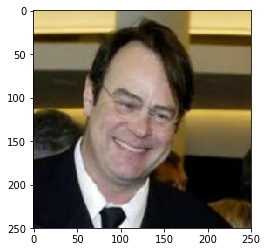

Actually human but resembles a  ...
Dogue de bordeaux


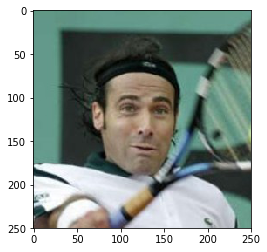

Actually human but resembles a  ...
Alaskan malamute


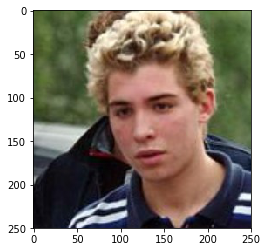

Actually human but resembles a  ...
Dogue de bordeaux


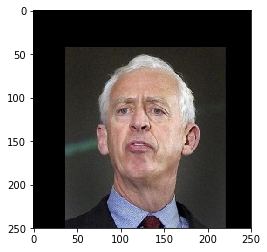

Actually human but resembles a  ...
Pharaoh hound


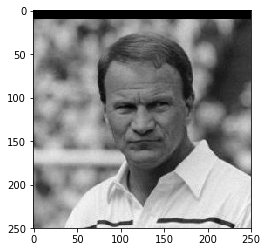

Actually human but resembles a  ...
Ibizan hound


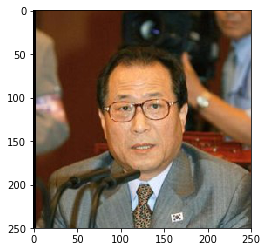

Actually human but resembles a  ...
Italian greyhound


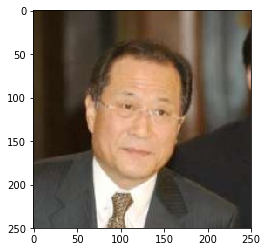

Actually human but resembles a  ...
Italian greyhound


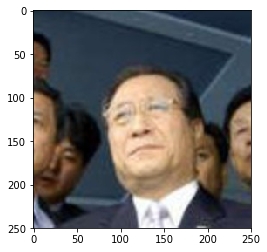

Actually human but resembles a  ...
Manchester terrier


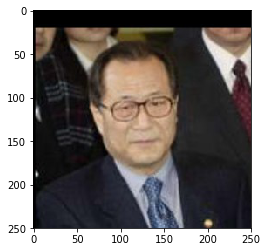

Actually human but resembles a  ...
Basenji


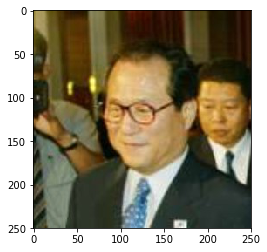

Actually human but resembles a  ...
Xoloitzcuintli


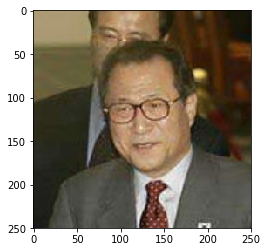

Actually human but resembles a  ...
Pharaoh hound


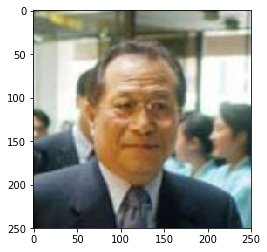

Actually human but resembles a  ...
Dogue de bordeaux


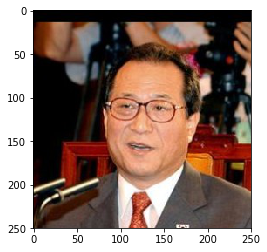

Actually human but resembles a  ...
Manchester terrier


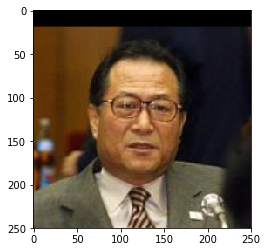

Actually human but resembles a  ...
Dogue de bordeaux


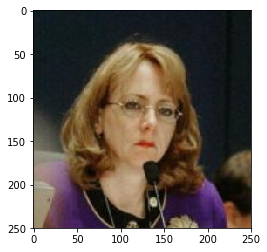

Actually human but resembles a  ...
Nova scotia duck tolling retriever


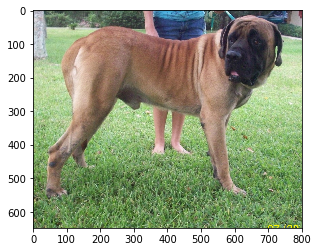

Clearly a dog specifically a  ...
Bullmastiff


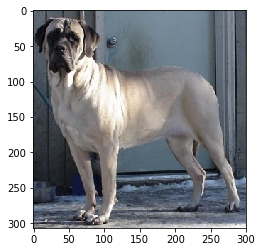

Clearly a dog specifically a  ...
Bullmastiff


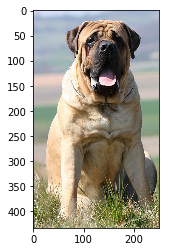

Clearly a dog specifically a  ...
Bullmastiff


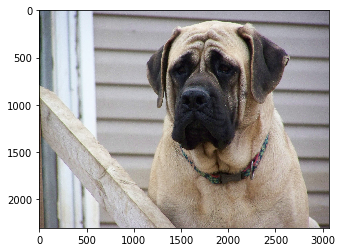

Clearly a dog specifically a  ...
Mastiff


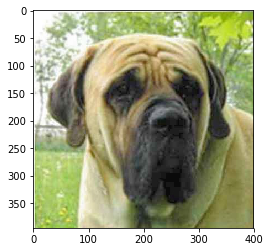

Clearly a dog specifically a  ...
Bloodhound


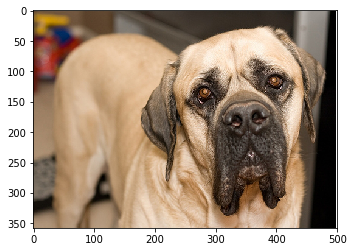

Clearly a dog specifically a  ...
Mastiff


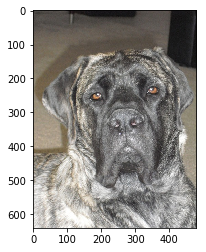

Clearly a dog specifically a  ...
Mastiff


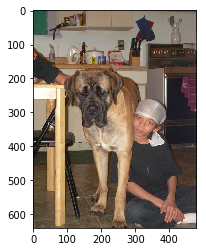

Clearly a dog specifically a  ...
Mastiff


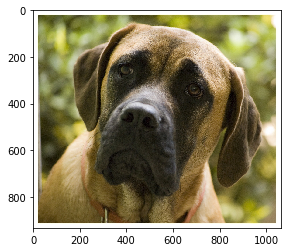

Clearly a dog specifically a  ...
American staffordshire terrier


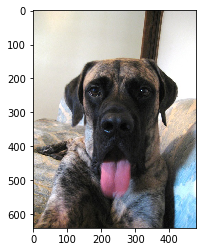

Clearly a dog specifically a  ...
Plott


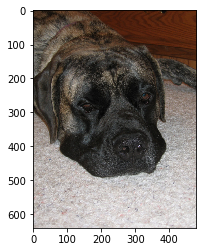

Clearly a dog specifically a  ...
Boxer


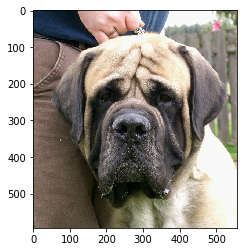

Clearly a dog specifically a  ...
Mastiff


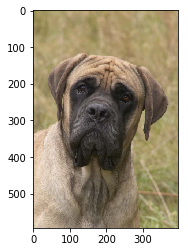

Clearly a dog specifically a  ...
Bullmastiff


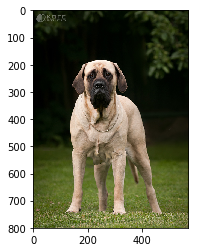

Clearly a dog specifically a  ...
Bullmastiff


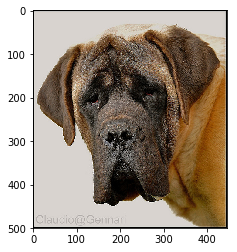

Clearly a dog specifically a  ...
Saint bernard


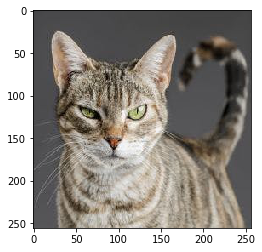

This image is neither dog nor human


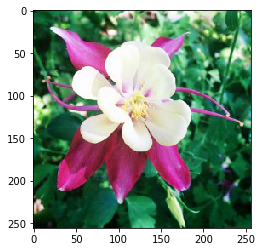

This image is neither dog nor human


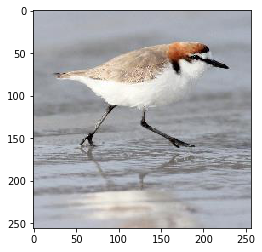

This image is neither dog nor human


In [71]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:15], dog_files[:15])):
    run_app(file)
    
run_app('neither_human_nor_dog/cat.jpg')
run_app('neither_human_nor_dog/flower.jpg')
run_app('neither_human_nor_dog/bird.jpg')